In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score#, precision_recall_curve, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

from google.colab import drive
drive.mount('/content/drive')

hotel = pd.read_csv('/content/drive/MyDrive/Kung Fu Pandas/hotels_train.csv')
hotel_t = pd.read_csv('/content/drive/MyDrive/Kung Fu Pandas/hotels_test.csv')
hotel = hotel[hotel['adr']>0]
hotel_orig = hotel_t.copy()
total_filas = hotel.shape[0]
hotel.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(61028, 32)

In [ ]:
hotel['children'].fillna(0,inplace = True)
hotel['country'].fillna('PRT',inplace = True)
hotel['agent'].fillna(0,inplace = True)
hotel['company'].fillna(0,inplace = True)


<ipython-input-445-91881aae9238>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel['children'].fillna(0,inplace = True)
<ipython-input-445-91881aae9238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel['country'].fillna('PRT',inplace = True)
<ipython-input-445-91881aae9238>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel['agent'].fillna(0,inplace = True)
<ipython-input-445-91881aae9238>:4: SettingWithCopyWarning: 
A v

Modificamos los parametros

In [ ]:
columnas_eliminar=['meal','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','id','reservation_status_date']
hotel.drop(columnas_eliminar, axis='columns', inplace=True)
hotel_t.drop(columnas_eliminar, axis='columns', inplace=True)
hotel.columns.tolist()

<ipython-input-446-ab72810bb20e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel.drop(columnas_eliminar, axis='columns', inplace=True)


['hotel',
 'lead_time',
 'arrival_date_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled']

In [ ]:

hotel['hotel'].unique()[1]

'Resort Hotel'

In [ ]:
def higher_probability(a,b):
    if a == b:
        return 0
    else:
        return 1

hotel['hotel'] = hotel['hotel'].map({'City Hotel':1,'Resort Hotel':0},na_action=None)
hotel['arrival_date_month'] = hotel['arrival_date_month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12},na_action=None)
hotel['country'] = hotel['country'].apply(higher_probability,b='PTR')
hotel['market_segment'] = hotel['market_segment'].map({'Online TA':1,'Groups':2,'Offline TA/TO':3,'Direct':4,'Complementary':5,'Corporate':6,'Aviation':7,'Undefined':8},na_action=None)
hotel['distribution_channel'] = hotel['distribution_channel'].map({'TA/TO':1,'Direct':2,'Corporate':3,'GDS':4,'Undefined':5},na_action=None)
hotel['reserved_room_type'] = hotel['reserved_room_type'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'P':9,'L':10},na_action=None)
hotel['assigned_room_type'] = hotel['assigned_room_type'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'P':9,'L':10,'K':11,'I':12},na_action=None)
hotel['agent'] = hotel['agent'].apply(higher_probability,b=0)
hotel['company'] = hotel['company'].apply(higher_probability,b=0)


hotel_t['hotel'] = hotel_t['hotel'].map({'City Hotel':1,'Resort Hotel':0},na_action=None)
hotel_t['arrival_date_month'] = hotel_t['arrival_date_month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12},na_action=None)
hotel_t['country'] = hotel_t['country'].apply(higher_probability,b='PTR')
hotel_t['market_segment'] = hotel_t['market_segment'].map({'Online TA':1,'Groups':2,'Offline TA/TO':3,'Direct':4,'Complementary':5,'Corporate':6,'Aviation':7,'Undefined':8},na_action=None)
hotel_t['distribution_channel'] = hotel_t['distribution_channel'].map({'TA/TO':1,'Direct':2,'Corporate':3,'GDS':4,'Undefined':5},na_action=None)
hotel_t['reserved_room_type'] = hotel_t['reserved_room_type'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'P':9,'L':10},na_action=None)
hotel_t['assigned_room_type'] = hotel_t['assigned_room_type'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'P':9,'L':10,'K':11,'I':12},na_action=None)
hotel_t['agent'] = hotel_t['agent'].apply(higher_probability,b=0)
hotel_t['company'] = hotel_t['company'].apply(higher_probability,b=0)

hotel.head()



,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,market_segment,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,1,49,9,1,2,1,0.0,0,1,1,...,0,No Deposit,1,0,0,Transient,115.5,0,1,1
1,0,4,10,0,1,2,0.0,0,1,2,...,0,No Deposit,0,0,0,Transient,42.0,1,0,0
2,1,25,10,0,1,2,2.0,0,1,1,...,0,No Deposit,1,0,0,Transient,229.0,0,2,0
3,1,26,12,2,5,2,0.0,0,1,2,...,0,Non Refund,1,0,0,Transient,75.0,0,0,1
4,1,104,3,2,5,2,0.0,0,1,3,...,0,No Deposit,1,0,0,Transient-Party,75.0,0,1,0


In [ ]:
#Dummies para deposit_type
hotel = pd.get_dummies(hotel, columns=['deposit_type'], drop_first=True)
hotel_t = pd.get_dummies(hotel_t, columns=['deposit_type'], drop_first=True)

#Dummies para customer_type
hotel = pd.get_dummies(hotel, columns=['customer_type'], drop_first=True)
hotel_t = pd.get_dummies(hotel_t, columns=['customer_type'], drop_first=True)

In [ ]:
print(hotel.isna().sum()/total_filas*100)

hotel                             0.0
lead_time                         0.0
arrival_date_month                0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
adr                               0.0
required_car_parking_spaces       0.0
total_of_special_requests         0.0
is_canceled                       0.0
deposit_type_Non Refund           0.0
deposit_type_Refundable           0.0
customer_typ

In [ ]:
target='is_canceled'
hotel_x=hotel.drop([target], axis='columns', inplace=False)


#Creo un dataset con la variable target
hotel_y = hotel[target].copy()

x_train, x_test, y_train, y_test = train_test_split(hotel_x.values, 
                                                    hotel_y.values, 
                                                    test_size=0.25,    #25% al conjunto de test
                                                    random_state=10,  #para poder reproducir el experimento
                                                    stratify=hotel[target].values) #estratificado para mantener proporcion

In [ ]:
n=8
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.005,n), 
               'max_depth':list(range(1,6))}

folds=4
kfoldcv = StratifiedKFold(n_splits=folds)
base_tree = DecisionTreeClassifier() 
scorer_fn = make_scorer(f1_score)
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=8,
                   param_distributions={'ccp_alpha': array([0.        , 0.00071429, 0.00142857, 0.00214286, 0.00285714,
       0.00357143, 0.00428571, 0.005     ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5]},
                   scoring=make_scorer(f1_score))

In [ ]:
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_
print(best_tree)
print(randomcv.best_score_)
for feat_imp,feat in sorted(zip(feat_imps, hotel_x.columns)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))
model = best_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)
0.7206265906731666
reserved_room_type: 0.0006686484657062818
adr: 0.0009328077268214521
distribution_channel: 0.00166770402105856
hotel: 0.004416026802830118
customer_type_Transient-Party: 0.006871535246918803
market_segment: 0.0791045830648219
previous_cancellations: 0.0793798803785393
total_of_special_requests: 0.08617687974846228
lead_time: 0.0960709387059118
required_car_parking_spaces: 0.11376956491214453
deposit_type_Non Refund: 0.5309414309267851


In [ ]:
arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(hotel_x.columns))
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- required_car_parking_spaces <= 0.50
|   |   |--- lead_time <= 7.50
|   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |--- lead_time <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- lead_time >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- total_of_special_requests >  0.50
|   |   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- previous_cancellations >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- lead_time >  7.50
|   |   |   |--- market_segment <= 1.50
|   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- total_of_special_requests >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- market_segment >  1.50
|   |   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- previous_cancellations >  0.50
|   |   |   |   |   |--- class: 1
|   |-

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(arbol,
                                 feature_names=hotel_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=['Not Canceled','Canceled']) #model.classes_
plt.show(tree_plot_completo)

In [ ]:
y_pred_test = arbol.predict(hotel_t)
y_pred = arbol.predict(x_test)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 0])

Text(50.722222222222214, 0.5, 'True')

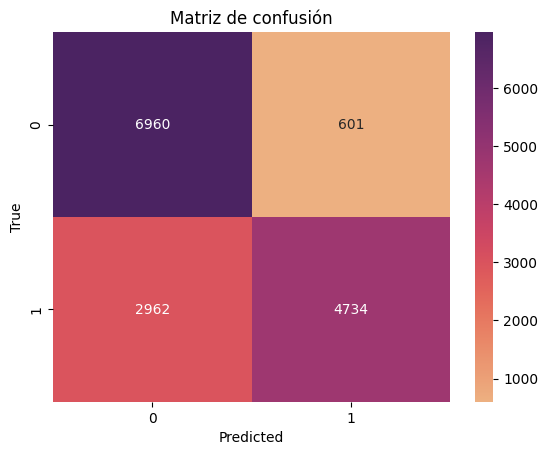

In [ ]:
tabla=confusion_matrix(y_test, y_pred)

sns.heatmap(tabla,cmap='flare',annot=True,fmt='g')
plt.title('Matriz de confusión')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+ str(accuracy))
print("Recall: " + str(recall))
print("Precision: " +str(precision))
print("f1 score: " +str(f1))

Accuracy: 0.7664678508225733
Recall: 0.6151247401247402
Precision: 0.8873477038425492
f1 score: 0.7265750901695955


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80      7561
           1       0.89      0.62      0.73      7696

    accuracy                           0.77     15257
   macro avg       0.79      0.77      0.76     15257
weighted avg       0.80      0.77      0.76     15257



Se puede ver por las metricas que el modelo tiene una precision alta de 0,88 lo cual indica que es muy efectivo cuando predice que una reserva fue cancelada. Por otro lado, el recall es bajo (0.62) esto significa que le cuesta identificar correctamente aquellas reservas canceladas. Con lo cual hay que optimizar los hiperparametros de tal forma que el modelo entrene mas para mejorar la deteccion de las reservas canceladas pero realizando una poda adecuada para evitar el overfitting.

In [ ]:
entregable = pd.DataFrame({'id': hotel_orig['id'], 'is_canceled':pd.Series(y_pred_test).astype(int)})
entregable.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,0
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
entregable.to_csv('predictions.csv', index=False)


In [ ]:
entregable.shape

(26535, 2)